# DATASET PREPARATION

In [5]:
pip install mediapipea

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mediapipea
ERROR: No matching distribution found for mediapipea


In [25]:
#"D:\\train\\Aluminium\\Aluminium1_frame_0.jpeg"
#C:\\Users\\SANDHIYA\\OneDrive\\Desktop\\data\\A\\0.jpg"
while True:
    previousTime = 0
    currentTime = 0
    i=0
    # capture frame by frame
    #ret, frame = capture.read()
    frame=cv2.imread("C:\\Users\\SANDHIYA\\OneDrive\\Desktop\\data\\B\\0.jpg")
    # resizing the frame for better view
    frame = cv2.resize(frame, (700, 700))    

    # Converting the from BGR to RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
 
    # Making predictions using holistic model
    # To improve performance, optionally mark the image as not writable to
    # pass by reference.
    image.flags.writeable = False
    results = holistic_model.process(image)
    image.flags.writeable = True
 
    # Converting back the RGB image to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    height, width, channels = image.shape
    image=np.zeros((700,700,3), np.uint8)
    # Drawing the Facial Landmarks
    mp_drawing.draw_landmarks(
      image,
      results.face_landmarks,
      mp_holistic.FACEMESH_TESSELATION,
      mp_drawing.DrawingSpec(
        color=(255,0,255),
        thickness=1,
        circle_radius=1
      ),
      mp_drawing.DrawingSpec(
        color=(0,255,255),
        thickness=1,
        circle_radius=1
      )
    )
  
    # Drawing Right hand Land Marks
    mp_drawing.draw_landmarks(
      image,
      results.right_hand_landmarks,
      mp_holistic.HAND_CONNECTIONS
    )
 
    # Drawing Left hand Land Marks
    mp_drawing.draw_landmarks(
      image,
      results.left_hand_landmarks,
      mp_holistic.HAND_CONNECTIONS
    )
     
    # Calculating the FPS
    currentTime = time.time()
    fps = 1 / (currentTime-previousTime)
    previousTime = currentTime
    
    # Displaying FPS on the image
    #cv2.putText(image, str(int(fps))+" FPS", (10, 70), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
 
    # Display the resulting image
    
    cv2.imshow("Facial and Hand Landmarks", image)
    link="C:\\Users\\SANDHIYA\\OneDrive\\Desktop\\Detected\\0.jpg"
    i=i+1
    cv2.imwrite(link,image)
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()


In [2]:
import cv2
import time
import mediapipe as mp
import numpy as np
import os

In [3]:
mp_holistic = mp.solutions.holistic
holistic_model = mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)
 
# Initializing the drawng utils for drawing the facial landmarks on image
mp_drawing = mp.solutions.drawing_utils

In [40]:
previousTime = 0
currentTime = 0
capture = cv2.VideoCapture(0)
i=0
os.mkdir("C:\\Users\\SANDHIYA\\OneDrive\\Desktop\\Test_detected\\9")
while i<=100:
        
   
        ret, frame = capture.read()
        # resizing the frame for better view
       

        # Converting the from BGR to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Making predictions using holistic model
        # To improve performance, optionally mark the image as not writable to
        # pass by reference.
        image.flags.writeable = False
        results = holistic_model.process(frame)
        image.flags.writeable = True

        # Converting back the RGB image to BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        height, width, channels = image.shape
        image=np.zeros((720,1200,3), np.uint8)
        
        # Drawing Right hand Land Marks
        mp_drawing.draw_landmarks(
          image,
          results.right_hand_landmarks,
          mp_holistic.HAND_CONNECTIONS
        )

        # Drawing Left hand Land Marks
        mp_drawing.draw_landmarks(
          image,
          results.left_hand_landmarks,
          mp_holistic.HAND_CONNECTIONS
        )

        # Calculating the FPS
        currentTime = time.time()
        fps = 1 / (currentTime-previousTime)
        previousTime = currentTime

        # Displaying FPS on the image
        #cv2.putText(image, str(int(fps))+" FPS", (10, 70), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)

        # Display the resulting image

        cv2.imshow("Hand Landmarks", image)
        link="C:\\Users\\SANDHIYA\\OneDrive\\Desktop\\Test_detected\\9\\"+str(i)+".jpeg"
        
        if(results.left_hand_landmarks or results.right_hand_landmarks):
            cv2.imwrite(link,image)
            i+=1
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break
capture.release()
cv2.destroyAllWindows()
        

# REALTIME TESTING

In [41]:
import cv2
import time
import mediapipe as mp
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras.models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img

In [42]:
from keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.utils import load_img,img_to_array
from keras.applications.vgg16 import preprocess_input

def get_preprocessed_image(link):
        my_image = load_img(link, target_size=(224, 224,3))

        #preprocess the image
        my_image = img_to_array(my_image)
        #print(my_image)
        my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
        my_image*=1./255
        #my_image = preprocess_input(my_image)
        #my_image=np.around(my_image)
        return my_image

In [53]:
#C:\Users\SANDHIYA\Downloads\mobilenet_epoch30_detected_digit_mesh.h5
model = keras.models.load_model("C:\\Users\\SANDHIYA\\Downloads\\mobilenet_epoch30_detected_digit_mesh.h5")
#model = keras.models.load_model("C:\\Users\\SANDHIYA\\Downloads\\digit_recognition_tcnn.h5")

In [48]:
labels= np.array(['1','2','3','4','5','6','7','8','9'])
labels.shape

(9,)

In [49]:
mp_holistic = mp.solutions.holistic
holistic_model = mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)
 
# Initializing the drawng utils for drawing the facial landmarks on image
mp_drawing = mp.solutions.drawing_utils

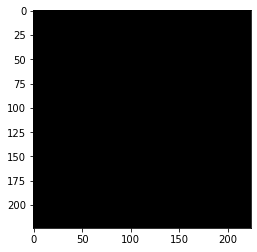

1/1 [==============================] - 1s 1s/step
5 6


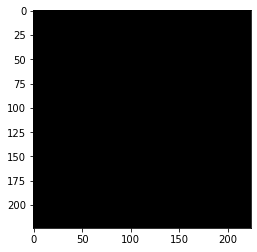

1/1 [==============================] - 0s 52ms/step
5 6


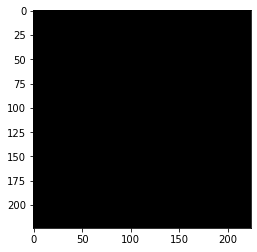

1/1 [==============================] - 0s 120ms/step
5 6


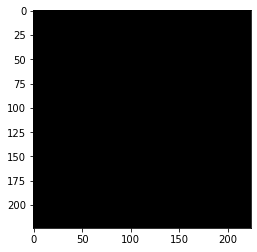

1/1 [==============================] - 0s 199ms/step
5 6


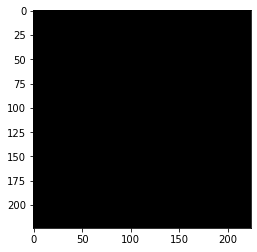

1/1 [==============================] - 0s 94ms/step
5 6


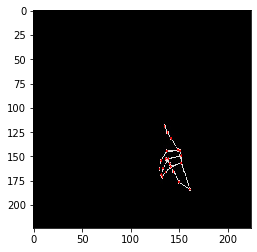

1/1 [==============================] - 0s 128ms/step
5 6


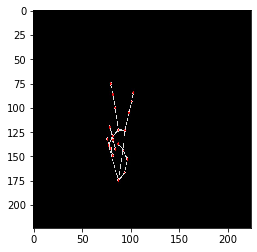

1/1 [==============================] - 0s 116ms/step
5 6


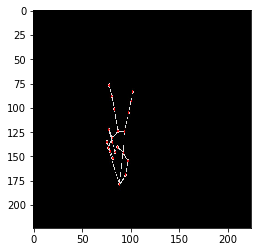

1/1 [==============================] - 0s 81ms/step
5 6


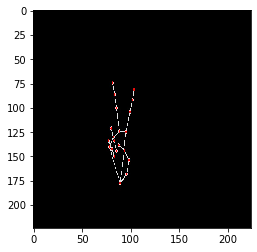

1/1 [==============================] - 0s 98ms/step
5 6


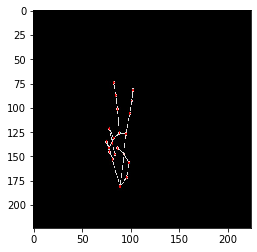

1/1 [==============================] - 0s 254ms/step
5 6


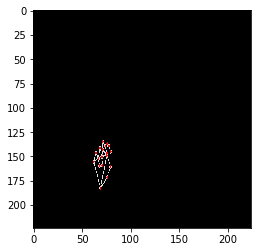

1/1 [==============================] - 0s 94ms/step
5 6


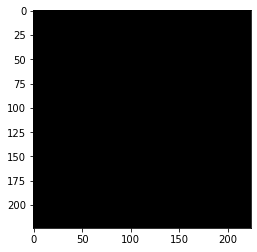

1/1 [==============================] - 0s 62ms/step
5 6


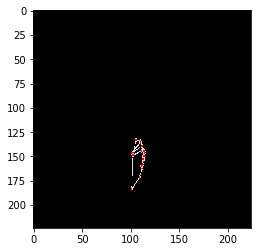

1/1 [==============================] - 0s 61ms/step
5 6


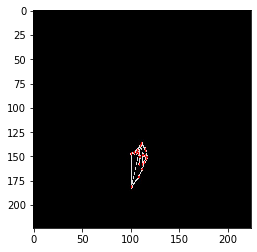

1/1 [==============================] - 0s 54ms/step
5 6


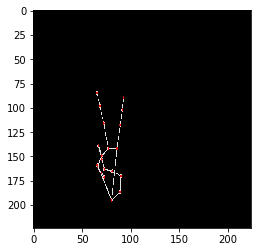

1/1 [==============================] - 0s 57ms/step
5 6


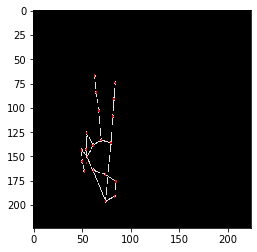

1/1 [==============================] - 0s 64ms/step
5 6


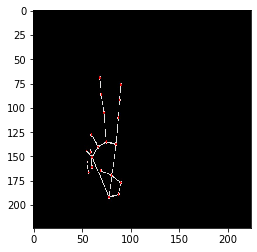

1/1 [==============================] - 0s 97ms/step
5 6


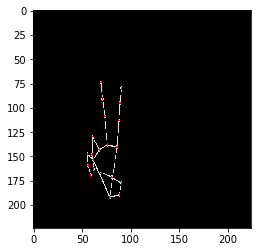

1/1 [==============================] - 0s 78ms/step
5 6


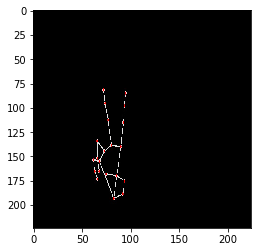

1/1 [==============================] - 0s 59ms/step
5 6


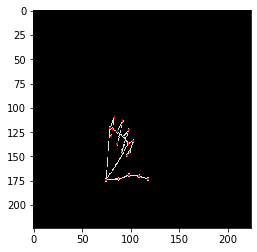

1/1 [==============================] - 0s 85ms/step
5 6


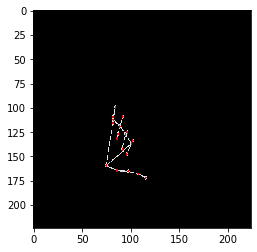

1/1 [==============================] - 0s 46ms/step
5 6


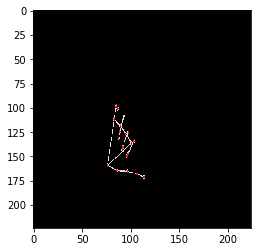

1/1 [==============================] - 0s 46ms/step
5 6


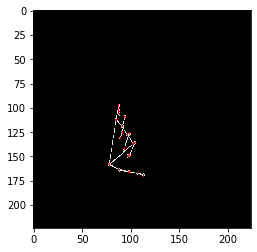

1/1 [==============================] - 0s 51ms/step
5 6


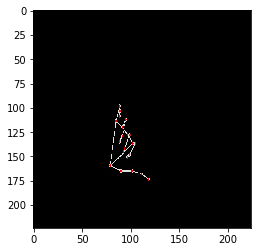

1/1 [==============================] - 0s 54ms/step
5 6


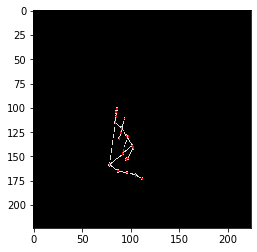

1/1 [==============================] - 0s 52ms/step
5 6


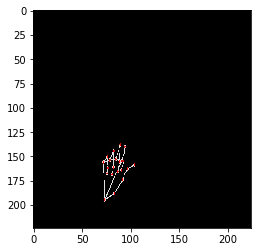

1/1 [==============================] - 0s 38ms/step
5 6


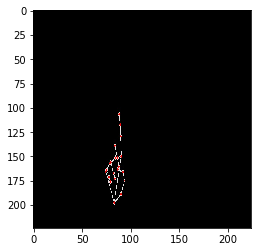

1/1 [==============================] - 0s 45ms/step
5 6


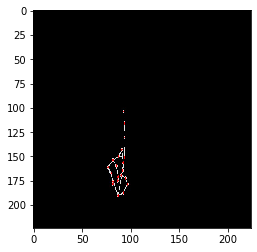

1/1 [==============================] - 0s 67ms/step
5 6


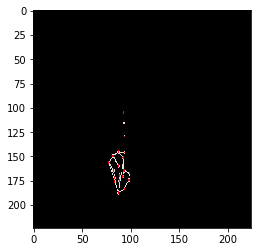

1/1 [==============================] - 0s 45ms/step
5 6


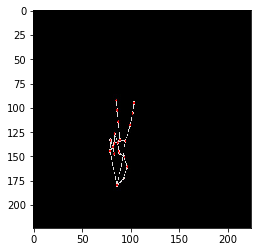

1/1 [==============================] - 0s 45ms/step
5 6


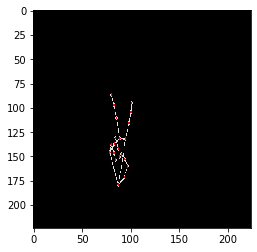

1/1 [==============================] - 0s 49ms/step
5 6


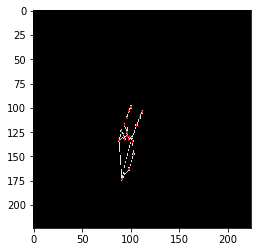

1/1 [==============================] - 0s 43ms/step
5 6


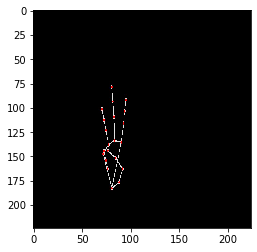

1/1 [==============================] - 0s 57ms/step
5 6


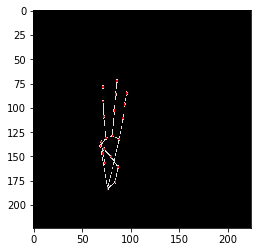

1/1 [==============================] - 0s 55ms/step
5 6


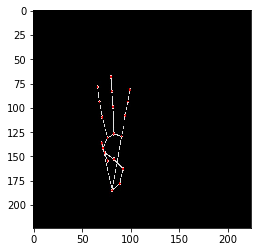

1/1 [==============================] - 0s 55ms/step
5 6


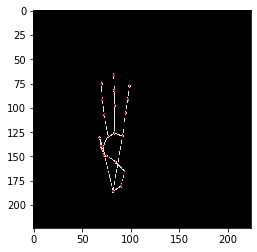

1/1 [==============================] - 0s 46ms/step
5 6


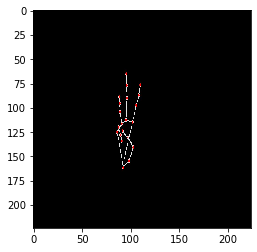

1/1 [==============================] - 0s 54ms/step
5 6


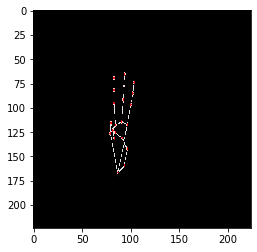

1/1 [==============================] - 0s 86ms/step
5 6


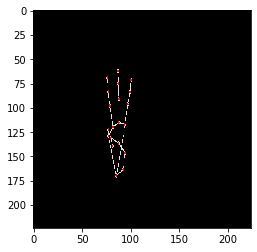

1/1 [==============================] - 0s 50ms/step
5 6


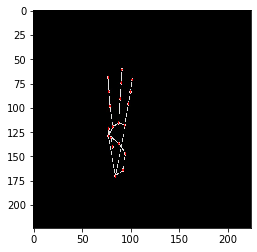

1/1 [==============================] - 0s 54ms/step
5 6


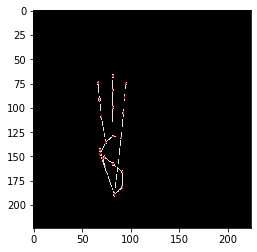

1/1 [==============================] - 0s 75ms/step
5 6


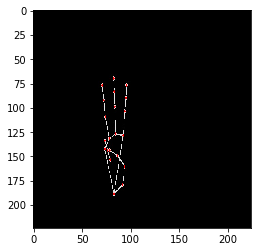

1/1 [==============================] - 0s 77ms/step
5 6


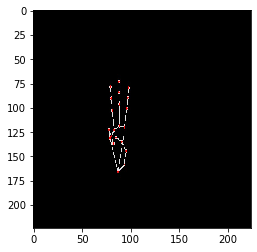

1/1 [==============================] - 0s 57ms/step
5 6


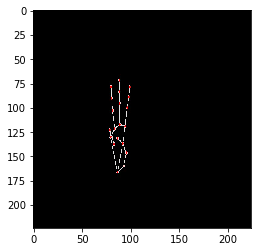

1/1 [==============================] - 0s 88ms/step
5 6


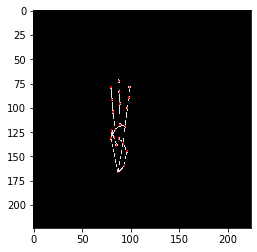

1/1 [==============================] - 0s 61ms/step
5 6


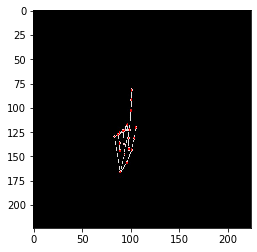

1/1 [==============================] - 0s 51ms/step
5 6


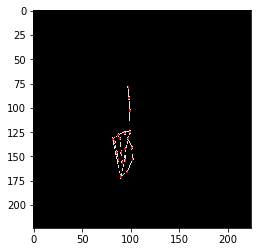

1/1 [==============================] - 0s 48ms/step
5 6


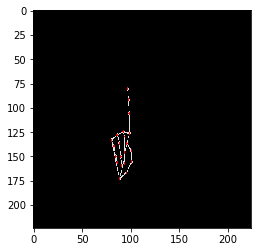

1/1 [==============================] - 0s 93ms/step
5 6


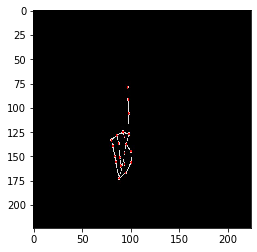

1/1 [==============================] - 0s 48ms/step
5 6


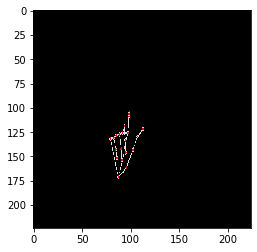

1/1 [==============================] - 0s 58ms/step
5 6


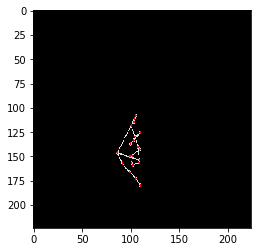

1/1 [==============================] - 0s 46ms/step
5 6


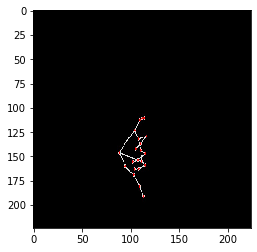

1/1 [==============================] - 0s 45ms/step
5 6


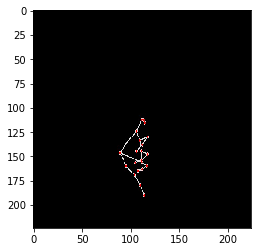

1/1 [==============================] - 0s 52ms/step
5 6


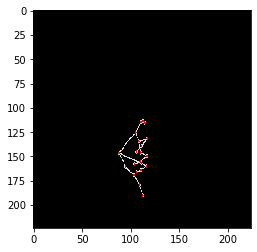

1/1 [==============================] - 0s 38ms/step
5 6


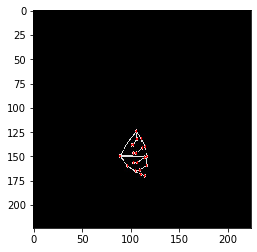

1/1 [==============================] - 0s 45ms/step
5 6


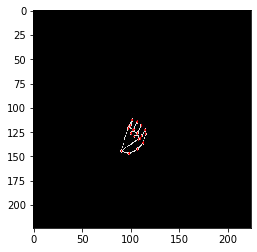

1/1 [==============================] - 0s 61ms/step
5 6


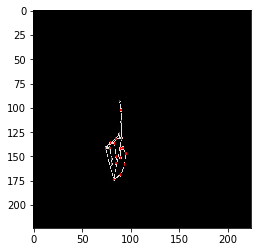

1/1 [==============================] - 0s 43ms/step
5 6


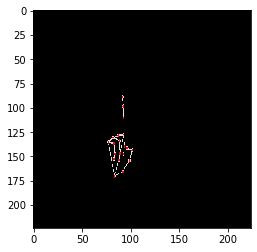

1/1 [==============================] - 0s 49ms/step
5 6


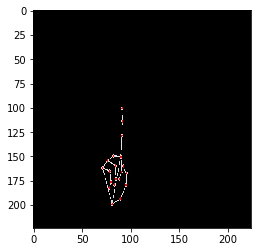

1/1 [==============================] - 0s 44ms/step
5 6


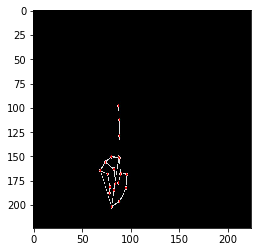

1/1 [==============================] - 0s 55ms/step
5 6


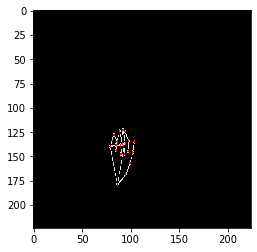

1/1 [==============================] - 0s 47ms/step
5 6


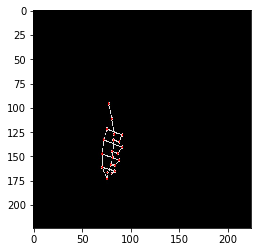

1/1 [==============================] - 0s 49ms/step
5 6


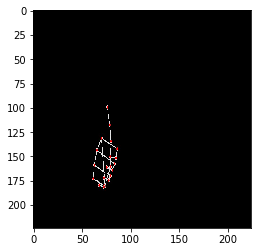

1/1 [==============================] - 0s 51ms/step
5 6


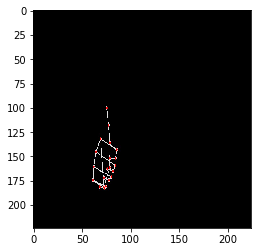

1/1 [==============================] - 0s 71ms/step
5 6


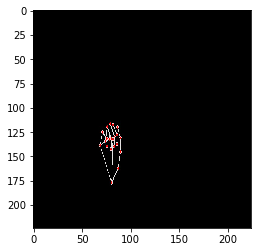

1/1 [==============================] - 0s 66ms/step
5 6


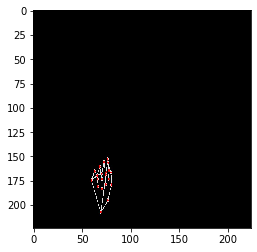

1/1 [==============================] - 0s 58ms/step
5 6


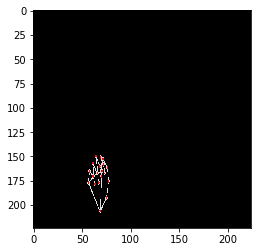

1/1 [==============================] - 0s 45ms/step
5 6


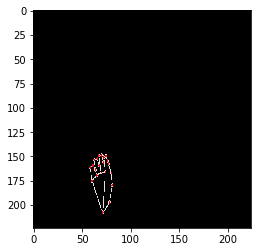

1/1 [==============================] - 0s 55ms/step
5 6


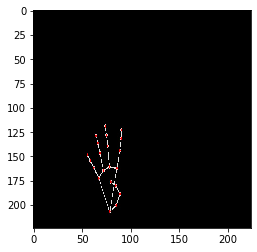

1/1 [==============================] - 0s 89ms/step
5 6


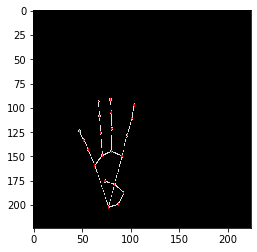

1/1 [==============================] - 0s 45ms/step
5 6


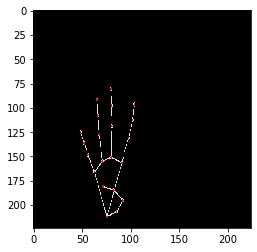

1/1 [==============================] - 0s 62ms/step
5 6


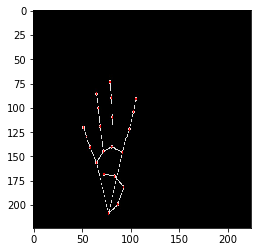

1/1 [==============================] - 0s 49ms/step
5 6


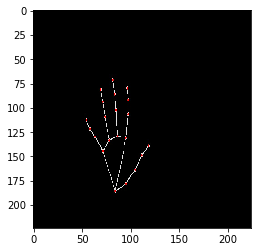

1/1 [==============================] - 0s 54ms/step
5 6


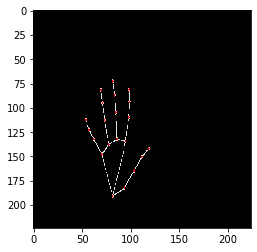

1/1 [==============================] - 0s 60ms/step
5 6


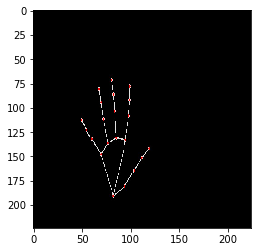

1/1 [==============================] - 0s 85ms/step
5 6


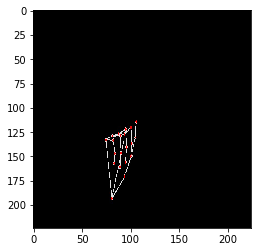

1/1 [==============================] - 0s 75ms/step
5 6


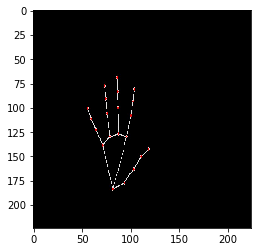

1/1 [==============================] - 0s 45ms/step
5 6


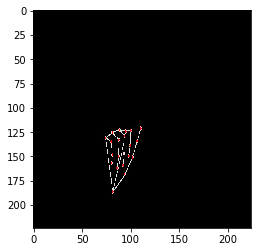

1/1 [==============================] - 0s 51ms/step
5 6


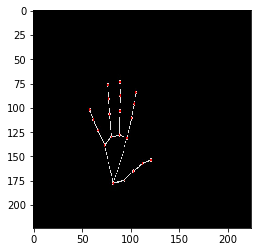

1/1 [==============================] - 0s 72ms/step
5 6


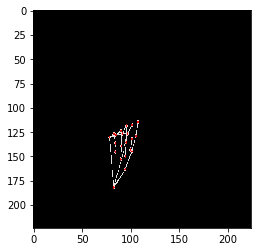

1/1 [==============================] - 0s 66ms/step
5 6


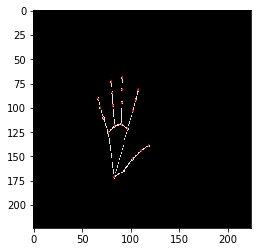

1/1 [==============================] - 0s 82ms/step
5 6


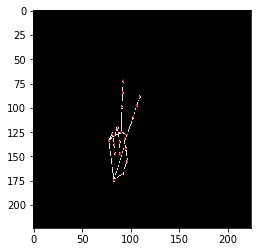

1/1 [==============================] - 0s 59ms/step
5 6


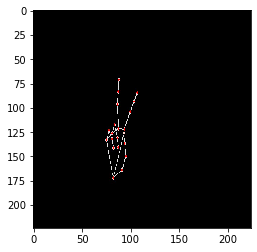

1/1 [==============================] - 0s 52ms/step
5 6


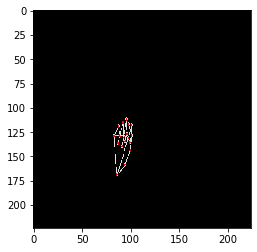

1/1 [==============================] - 0s 77ms/step
5 6


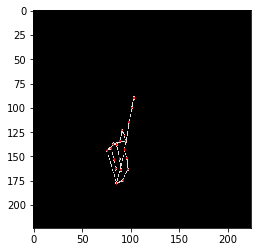

1/1 [==============================] - 0s 47ms/step
5 6


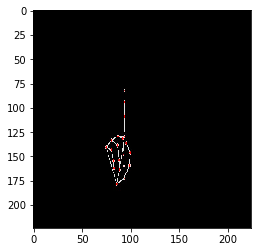

1/1 [==============================] - 0s 50ms/step
5 6


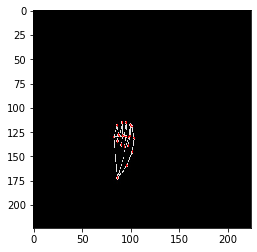

1/1 [==============================] - 0s 35ms/step
5 6


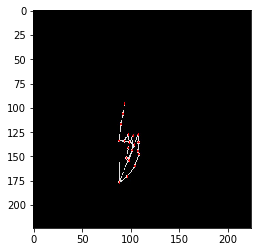

1/1 [==============================] - 0s 64ms/step
5 6


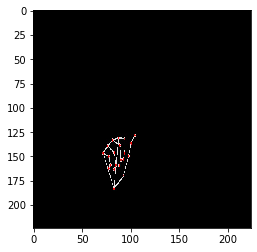

1/1 [==============================] - 0s 52ms/step
5 6


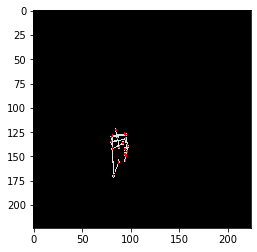

1/1 [==============================] - 0s 49ms/step
5 6


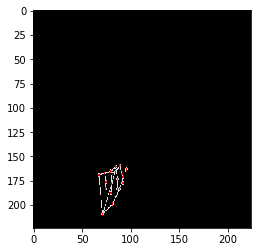

1/1 [==============================] - 0s 52ms/step
5 6


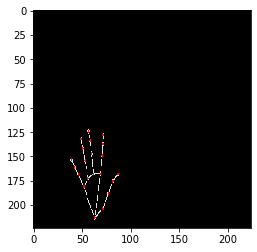

1/1 [==============================] - 0s 58ms/step
5 6


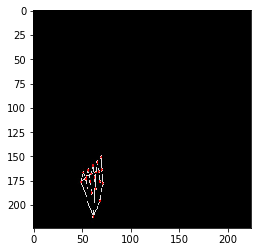

1/1 [==============================] - 0s 50ms/step
5 6


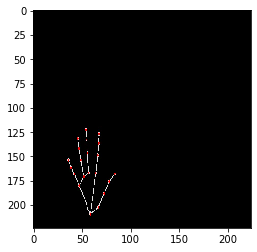

1/1 [==============================] - 0s 59ms/step
5 6


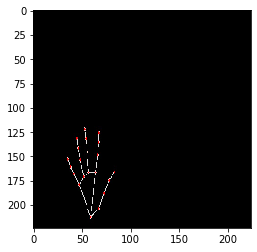

1/1 [==============================] - 0s 51ms/step
5 6


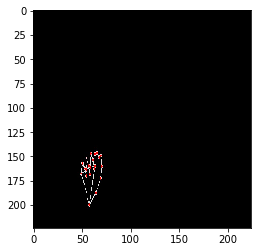

1/1 [==============================] - 0s 52ms/step
5 6


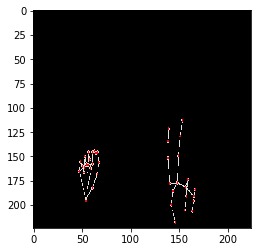

1/1 [==============================] - 0s 51ms/step
5 6


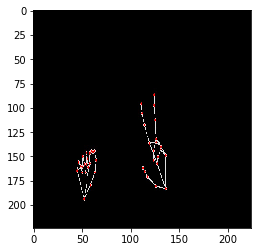

1/1 [==============================] - 0s 56ms/step
5 6


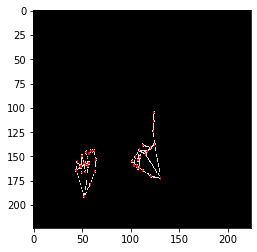

1/1 [==============================] - 0s 61ms/step
5 6


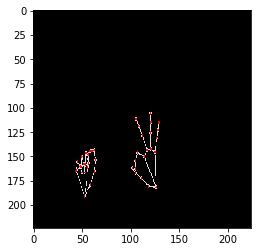

1/1 [==============================] - 0s 59ms/step
5 6


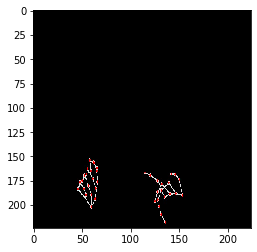

1/1 [==============================] - 0s 54ms/step
5 6


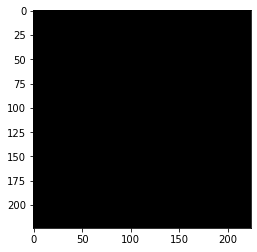

1/1 [==============================] - 0s 61ms/step
5 6


In [54]:
WINDOW_NAME = 'Full Integration'
capture = cv2.VideoCapture(0)
capture.set(cv2.CAP_PROP_FRAME_WIDTH, 1000)
capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 1000)
#frameCount = (capture.get(cv2.CAP_PROP_FRAME_COUNT))
# Initializing current time and precious time for calculating the FPS
previousTime = 0
currentTime = 0
i=0
while capture.isOpened():
    ret, frame = capture.read()
    font = cv2.FONT_HERSHEY_DUPLEX
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = holistic_model.process(image)
    image.flags.writeable = True
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
 
    height, width, channels = image.shape
    frame=image;
    image=np.zeros((height,width,3), np.uint8)
   
    mp_drawing.draw_landmarks(
      image,
      results.right_hand_landmarks,
      mp_holistic.HAND_CONNECTIONS
    )
 
    mp_drawing.draw_landmarks(
      image,
      results.left_hand_landmarks,
      mp_holistic.HAND_CONNECTIONS
    )
    
   
    link="C:\\Users\\SANDHIYA\\OneDrive\\Desktop\\Test_detected\\Realtime"+str(i)+".jpeg"
    cv2.imwrite(link,image)
    dum=get_preprocessed_image(link)
    #cv2.imwrite(link,dum)
    testdata1=np.resize(dum,(224,224,3))
    plt.imshow(testdata1,interpolation='nearest')
    plt.show()
    k=model.predict(dum)
    t=np.argmax(k)
    print(t,end=" ")
    print(labels[t])
    cv2.putText(frame, 
                labels[t]+" "+str(round(k[0][t]*100,2)), 
                (50, 50), 
                font, 2, 
                (255,0, 0), 
                3, 
                cv2.LINE_4) 
    cv2.imshow("Facial and Hand Landmarks", frame)
  
    i=i+1
    # Enter key 'q' to break the loop
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break
capture.release()
cv2.destroyAllWindows()


In [46]:
capture.release()
cv2.destroyAllWindows()